In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [216]:
weekGP = pd.read_csv('finalData/GPweekPred.csv')
weekGP = weekGP.iloc[470:, 1:]
weekGP.reset_index(drop=True, inplace=True)
weekGP.head()

,1000201,1000202,1000500,1000600,1000700,1000800,1000900,1001001,1001002,1001200,...,5027900,5029102,5029103,5029104,5030301,5030302,5031901,5031902,5032300,Date
47,0.278582,0.717360,0.0,1.724026,1.034795,1.301636,0.607771,0.092240,0.930775,0.882211,...,0.087975,0.295981,0.293251,0.581417,0.238705,0.255597,1.002583,0.258046,0.398426,2017-11-27
48,0.274369,0.713993,0.0,1.719616,1.023775,1.292923,0.589550,0.091546,0.925744,0.878272,...,0.086567,0.288850,0.289858,0.575719,0.235950,0.245734,0.999387,0.252278,0.392820,2017-12-04
49,0.270187,0.710565,0.0,1.715077,1.012757,1.284139,0.571480,0.090849,0.920644,0.874265,...,0.085169,0.281780,0.286476,0.570003,0.233199,0.235997,0.996112,0.246553,0.387266,2017-12-11
50,0.266037,0.707079,0.0,1.710409,1.001744,1.275286,0.553567,0.090149,0.915478,0.870191,...,0.083779,0.274772,0.283106,0.564270,0.230455,0.226385,0.992758,0.240873,0.381764,2017-12-18
51,0.261919,0.703534,0.0,1.705611,0.990738,1.266366,0.535814,0.089448,0.910246,0.866050,...,0.082398,0.267828,0.279748,0.558523,0.227717,0.216901,0.989325,0.235239,0.376315,2017-12-25


In [217]:
weekReal = pd.read_csv('finalData/WeekReal2017.csv')
weekReal = weekReal.iloc[:, 1:]
weekReal.head()

,Date,1000201,1000202,1000500,1000600,1000700,1000800,1000900,1001001,1001002,...,5027706,5027900,5029102,5029103,5029104,5030301,5030302,5031901,5031902,5032300
0,2017-01-02,0.0,2.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,...,2.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0
1,2017-01-09,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
2,2017-01-16,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2017-01-23,0.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2017-01-30,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [284]:
rf_test = pd.read_csv('finalData/y_test.csv')
rf_test = rf_test
rf_test.head()

,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,...,2018/43,2018/44,2018/45,2018/46,2018/47,2018/48,2018/49,2018/50,2018/51,2018/52
0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
3,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [283]:
rfPred = pd.read_csv('finalData/y_pred.csv')
rfPred = rfPred
rfPred.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.14,0.01,0.12,0.18,0.08,0.18,0.22,0.28,0.11,0.04,...,0.08,0.11,0.10,0.02,0.00,0.15,0.06,0.02,0.07,0.00
1,0.09,0.09,0.13,0.19,0.20,0.06,0.17,0.19,0.13,0.07,...,0.05,0.14,0.08,0.12,0.03,0.12,0.01,0.08,0.05,0.06
2,0.80,1.14,1.07,1.05,1.12,1.33,1.21,1.38,1.00,1.20,...,0.94,0.93,0.94,0.63,0.58,0.74,1.03,0.90,0.70,0.70
3,0.50,0.56,0.64,0.46,0.56,0.56,0.55,0.57,0.39,0.49,...,0.32,0.45,0.41,0.54,0.35,0.31,0.34,0.16,0.53,0.30
4,0.37,0.44,0.76,0.28,0.46,0.48,0.59,0.44,0.50,0.45,...,0.43,0.42,0.43,0.44,0.50,0.52,0.30,0.34,0.41,0.26


In [412]:
def weekly_check(real, pred):
    dicts_real = {}
    dicts_pred = {}

    for i in range(51):
        for j in range(50):
            R = real.iloc[:,i].sort_values(ascending=False).iloc[0:j+1]
            real_value = R.sum()
            if i in dicts_real:
                dicts_real[i].append(real_value)
            else:
                dicts_real[i] = [real_value]

            P = pred.iloc[:,i].sort_values(ascending=False).iloc[0:j+1].to_frame()
            pred_value = P.merge(R.to_frame(), left_index=True, right_index=True).iloc[:,0].sum()
            if i in dicts_pred:
                dicts_pred[i].append(pred_value)
            else:
                dicts_pred[i] = [pred_value]

    real_df = pd.DataFrame.from_dict(dicts_real, orient='index')
    pred_df = pd.DataFrame.from_dict(dicts_pred, orient='index')

    return real_df, pred_df

In [413]:
a, b = weekly_check(weekreal_new1, rf2017preds)

In [414]:
realRF = a.T
predRF = b.T
sumRF_real = realRF.sum(axis=1)
sumRF_pred = predRF.sum(axis=1)

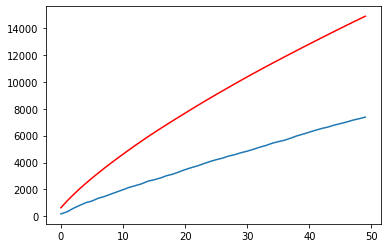

In [415]:
plt.plot(sumRF_real, color='red')
plt.plot(sumRF_pred)

In [399]:
weekreal_new1 = weekreal_new.copy()
weekreal_new1.index = weekreal_new1.index.astype(int)

In [317]:
weekGP_new = weekGP.iloc[:, :-1].T
weekreal_new = weekReal.iloc[:, 1:].T
weekreal_new.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
1000201,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1000202,2.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0
1000500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000600,3.0,2.0,2.0,2.0,0.0,2.0,3.0,0.0,2.0,5.0,...,2.0,4.0,2.0,3.0,5.0,3.0,2.0,1.0,2.0,3.0
1000700,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,0.0,4.0,...,1.0,0.0,2.0,1.0,1.0,0.0,2.0,3.0,2.0,0.0


In [318]:
aGP, bGP = weekly_check(weekreal_new, weekGP_new)

In [319]:
realGP = aGP.T
predGP = bGP.T
sumGPreal = realGP.sum(axis=1)
sumGPpred = predGP.sum(axis=1)

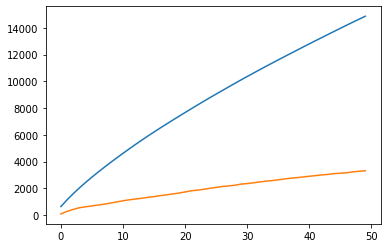

In [320]:
plt.plot(sumGPreal)
plt.plot(sumGPpred)

In [330]:
lstmResults = pd.read_csv('finalData/LSTM_pred_50.csv')
lstmResults = lstmResults.iloc[:, 1:]
lstmResults.replace({'False':0}, inplace=True)
lstmResults.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,0,18.873477647931672,18.873477647931672,18.873478,24.845004,24.845004,24.845004,24.845004,24.845004,...,49.448841,49.448841,52.843845,52.843845,56.182249,56.182249,59.508667,59.508667,68.424488,71.659065
1,0,9.792297178598888,20.36306149691903,26.55770486766496,26.557705,26.557705,35.251941,35.251941,40.537323,40.537323,...,84.127154,84.127154,84.127154,89.017662,89.017662,89.017662,92.394179,92.394179,92.394179,95.690744
2,0,0,18.81989911105899,18.81989911105899,28.292551,28.292551,28.292551,33.603578,39.597608,39.597608,...,103.737221,103.737221,103.737221,103.737221,103.737221,107.106156,114.943214,118.469114,118.469114,123.463065
3,0,0,8.070295650500556,13.961270956562146,13.961271,13.961271,19.425861,24.693883,24.693883,24.693883,...,90.592769,93.949674,97.291330,97.291330,100.798674,100.798674,100.798674,103.999551,107.200427,110.641681
4,0,0,7.908155234666451,7.908155234666451,13.387672,13.387672,13.387672,13.387672,13.387672,13.387672,...,67.514534,70.879706,75.141553,78.405770,78.405770,78.405770,78.405770,78.405770,83.695026,83.695026


In [342]:
for col in lstmResults.columns:
    lstmResults[col] = lstmResults[col].astype(float)

In [349]:
lstmPred = pd.DataFrame(lstmResults.T.sum(axis=1))

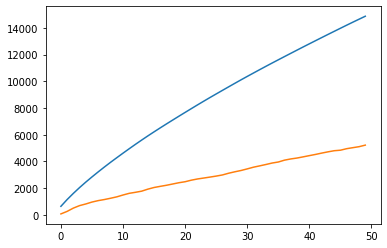

In [352]:
plt.plot(sumGPreal)
plt.plot(lstmPred.values)

In [411]:
rf2017preds = pd.read_csv('finalData/df_ypredRF.csv')
rf2017preds.index = rf2017preds.BoroCT2010.values
rf2017preds.drop(columns={'BoroCT2010'}, inplace=True)
rf2017preds.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
1000201,0.29,0.19,0.81,0.15,0.21,0.15,0.22,0.20,0.17,0.13,...,0.68,0.79,0.17,0.25,0.74,0.24,0.24,0.73,0.72,0.08
1000202,1.61,0.29,1.52,0.95,0.86,0.20,0.20,0.82,1.46,0.79,...,0.22,0.25,0.97,1.91,0.32,0.85,0.17,0.76,0.16,0.80
1000500,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00
1000600,2.31,2.00,1.81,1.80,0.72,1.71,2.36,0.72,1.84,3.67,...,1.86,3.05,1.94,2.45,3.17,2.55,1.85,1.38,1.88,2.17
1000700,1.30,1.20,1.36,0.53,3.13,1.08,1.78,1.89,0.63,3.05,...,1.17,0.78,1.68,1.18,1.19,0.62,1.97,2.07,1.81,0.45


In [383]:
weekreal_new.merge(rf2017preds)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51


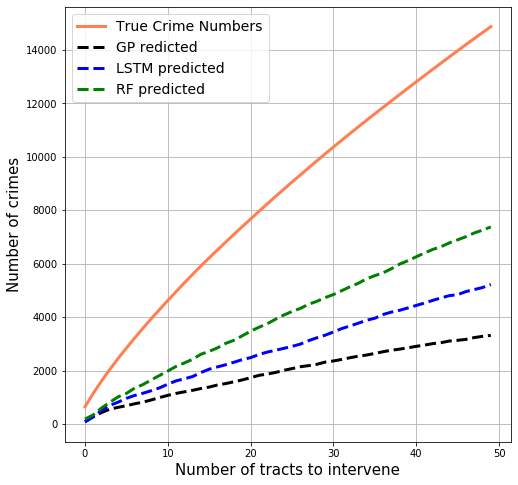

In [420]:
plt.figure(figsize=(8,8))

plt.plot(range(50), sumGPreal, color='coral', linewidth=3, label='True Crime Numbers')
plt.plot(range(50), sumGPpred, 'k--', linewidth=3, label='GP redicted')
plt.plot(range(50), lstmPred.values, 'k--', color='blue', linewidth=3, label='LSTM predicted')
plt.plot(range(50), sumRF_pred, 'k--', color='green', linewidth=3, label='RF predicted')
plt.xlabel('Number of tracts to intervene', fontsize=15)
plt.ylabel('Number of crimes', fontsize=15)
plt.legend(fontsize=14)
plt.grid(True)

In [433]:
import geopandas as gpd

ct = gpd.read_file('ct/geo_export_a0d9c6b6-aa01-4614-864e-ae8521d74700.shp')
ct['boro_ct201'] = ct['boro_ct201'].astype(int)
ct.head()


,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...


In [430]:
RFagg = pd.DataFrame(rf2017preds.sum(axis=1))
RFagg.reset_index(inplace=True)
RFagg.rename(columns={'index':'2017pred'}, inplace=True)
RFagg.head()

,2017pred,0
0,1000201,21.97
1,1000202,36.92
2,1000500,0.31
3,1000600,97.07
4,1000700,73.98


In [511]:
RFagg = ct.merge(RFagg, left_on='boro_ct201', right_on='2017pred')

In [455]:
X = RFagg[0].values
X = X/X.sum()
X

array([0.0005814 , 0.00099722, 0.0017032 , ..., 0.00023609, 0.00047163,
       0.000209  ])

In [456]:
RFagg['Predperc'] = X
RFagg.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,2017pred,0,Predperc
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,5000900,53.44,0.000581
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...,1009800,91.66,0.000997
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...,1010000,156.55,0.001703
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...,1010200,75.71,0.000824
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...,1010400,239.03,0.002601


In [509]:
RFagg_sort = RFagg.sort_values(by='Predperc', ascending=False)[:50]
RFagg_sort.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,2017pred,0,Predperc
539,1,1011900,Manhattan,I,011900,119,MN17,Midtown-Midtown South,3807,1.911311e+06,5722.090339,POLYGON ((-73.98225528672133 40.75738736489549...,1011900,362.25,0.003941
1208,1,1010900,Manhattan,I,010900,109,MN17,Midtown-Midtown South,3807,1.891365e+06,5703.531520,POLYGON ((-73.98594653087758 40.75231680555549...,1010900,358.23,0.003897
1561,1,1007600,Manhattan,I,007600,76,MN17,Midtown-Midtown South,3807,1.873518e+06,5717.633510,POLYGON ((-73.98407636095357 40.74910212538399...,1007600,251.97,0.002741
1808,1,1005200,Manhattan,I,005200,52,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.815429e+06,5790.388169,POLYGON ((-73.98730154868954 40.73890302603643...,1005200,244.84,0.002664
1563,1,1010100,Manhattan,I,010100,101,MN17,Midtown-Midtown South,3807,1.891378e+06,5701.715857,POLYGON ((-73.98776905945839 40.74978702894176...,1010100,244.68,0.002662


(-74.28337047811617, -73.67222994890714, 40.4751445260786, 40.93650364609694)

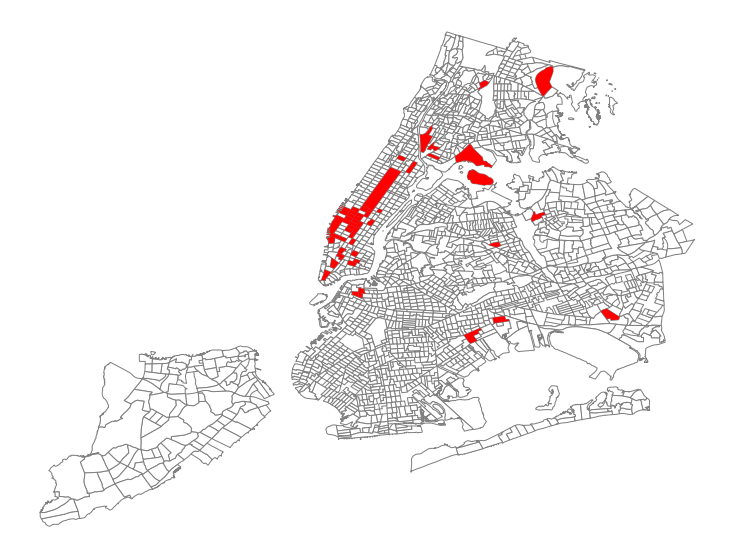

In [470]:
ax1 = RFagg.plot(color='white', edgecolor='grey', figsize=(15,10))
RFagg_sort.plot(color='red', ax=ax1)
plt.axis('off')

In [486]:
RFagg_sort.to_csv('RFagg_sort.csv')

In [506]:
realagg = pd.DataFrame(weekreal_new.sum(axis=1))
realagg.reset_index(inplace=True)
realagg.rename(columns={'index':'2017real'}, inplace=True)
realagg.head()

,2017real,0
0,1000201,21.0
1,1000202,38.0
2,1000500,0.0
3,1000600,108.0
4,1000700,72.0


In [507]:
realagg['2017real'] = realagg['2017real'].astype(int)

In [508]:
realagg = ct.merge(realagg, left_on='boro_ct201', right_on='2017real')
realagg.head()
realagg_sort = realagg.sort_values(by=0, ascending=False)[:50]
realagg_sort.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,2017real,0
1361,1,1010900,Manhattan,I,010900,109,MN17,Midtown-Midtown South,3807,1.891365e+06,5703.531520,POLYGON ((-73.98594653087758 40.75231680555549...,1010900,443.0
631,1,1011900,Manhattan,I,011900,119,MN17,Midtown-Midtown South,3807,1.911311e+06,5722.090339,POLYGON ((-73.98225528672133 40.75738736489549...,1011900,402.0
1731,2,2000100,Bronx,I,000100,1,BX98,Rikers Island,3710,1.816383e+07,18898.116621,POLYGON ((-73.87287195903875 40.78597502780474...,2000100,387.0
2000,2,2006500,Bronx,I,006500,65,BX34,Melrose South-Mott Haven North,3710,2.816028e+06,9811.640279,"POLYGON ((-73.9159913012154 40.8172115676259, ...",2006500,361.0
2004,1,1005200,Manhattan,I,005200,52,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.815429e+06,5790.388169,POLYGON ((-73.98730154868954 40.73890302603643...,1005200,283.0


In [487]:
realagg_sort.to_csv('realAggSort.csv')

(-74.28337047811617, -73.67222994890714, 40.4751445260786, 40.93650364609694)

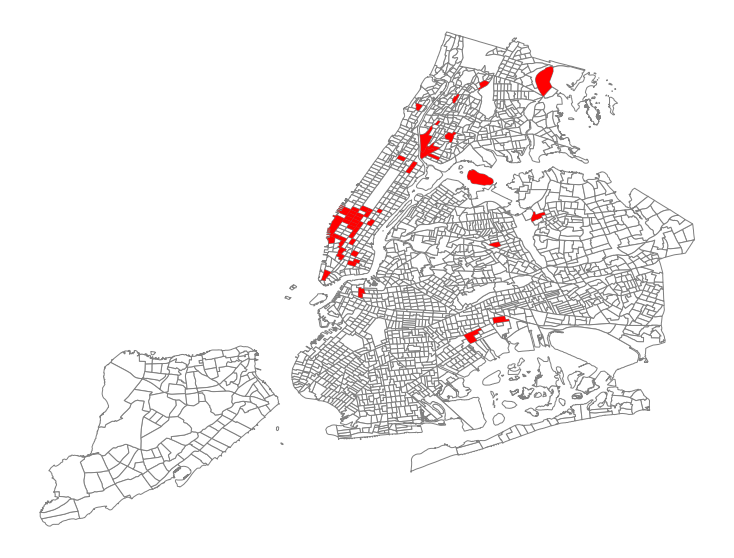

In [484]:
ax1 = ct.plot(color='white', edgecolor='grey', figsize=(15,10))
realagg_sort.plot(color='red', ax=ax1)
plt.axis('off')

In [498]:
rfPredOP = pd.read_csv('finalData/rf_pred_op.csv')
rfPredOP.head()

,boro_ct201,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,51
0,1000201,0.106144,0.069543,0.296471,0.054902,0.076863,0.054902,0.080523,0.073203,0.062222,...,0.248889,0.289150,0.062222,0.091503,0.270850,0.087843,0.087843,0.267190,0.263530,0.029281
1,1000600,4.325311,3.744858,3.389096,3.370372,1.348149,3.201853,4.418932,1.348149,3.445269,...,3.482718,5.710908,3.632512,4.587451,5.935600,4.774694,3.463993,2.583952,3.520166,4.063171
2,1000800,0.396892,0.619539,1.132595,1.326201,0.367851,1.713413,2.265190,1.093874,1.761814,...,1.335881,1.848937,0.745383,1.219718,2.991212,1.723093,0.464654,1.635971,1.781175,0.329130
3,1001200,1.320103,1.848144,2.051236,2.396494,1.502886,1.462268,1.746597,1.685670,1.320103,...,2.335566,2.010618,2.234020,1.340412,1.665360,1.766907,1.929381,1.787216,1.868453,1.746597
4,1001300,9.161769,8.681377,9.196083,10.911770,10.259809,9.093142,8.784318,10.946084,10.534319,...,16.573538,13.039222,13.553928,10.294123,11.357849,10.602946,10.911770,13.107850,9.779417,7.857847


In [499]:
rfPredOP.shape

(1823, 53)

In [500]:
rfOPagg = pd.DataFrame(rfPredOP.iloc[:, 1:].sum(axis=1))
rfOPagg['boro_ct201'] = rfPredOP.boro_ct201
rfOPagg.head()

,0,boro_ct201
0,8.041311,1000201
1,181.756674,1000600
2,71.760058,1000800
3,96.306567,1001200
4,586.147348,1001300


In [504]:
rfOPagg = ct.merge(rfOPagg, on='boro_ct201')
rfOPagg.head()
rfOP_sort = rfOPagg.sort_values(by=0, ascending=False)[:50]
rfOP_sort.head()

,boro_code_x,boro_ct201,boro_name_x,cdeligibil_x,ct2010_x,ctlabel_x,ntacode_x,ntaname_x,puma_x,shape_area_x,...,cdeligibil_y,ct2010_y,ctlabel_y,ntacode_y,ntaname_y,puma_y,shape_area_y,shape_leng_y,geometry_y,0
1164,1,1022900,Manhattan,E,022900,229,MN04,Hamilton Heights,3802,2.186916e+06,...,E,022900,229,MN04,Hamilton Heights,3802,2.186916e+06,7284.876181,POLYGON ((-73.95469736685665 40.82791838551446...,3983.370199
1475,1,1018900,Manhattan,E,018900,189,MN12,Upper West Side,3806,2.853971e+06,...,E,018900,189,MN12,Upper West Side,3806,2.853971e+06,6761.852465,POLYGON ((-73.96003018503222 40.79803810789713...,2019.041192
1742,2,2038900,Bronx,E,038900,389,BX06,Belmont,3705,1.860955e+06,...,E,038900,389,BX06,Belmont,3705,1.860955e+06,5457.199010,POLYGON ((-73.88179096529693 40.85752387966546...,1918.138201
754,1,1007000,Manhattan,I,007000,70,MN20,Murray Hill-Kips Bay,3808,1.908709e+06,...,I,007000,70,MN20,Murray Hill-Kips Bay,3808,1.908709e+06,5538.103552,POLYGON ((-73.97350834958276 40.74378203418565...,1227.296193
1573,2,2046201,Bronx,I,046201,462.01,BX13,Co-op City,3703,2.346356e+07,...,I,046201,462.01,BX13,Co-op City,3703,2.346356e+07,22014.903526,"POLYGON ((-73.820274329496 40.88555070032773, ...",1172.538011


(-74.28337047811617, -73.67222994890714, 40.4751445260786, 40.93650364609694)

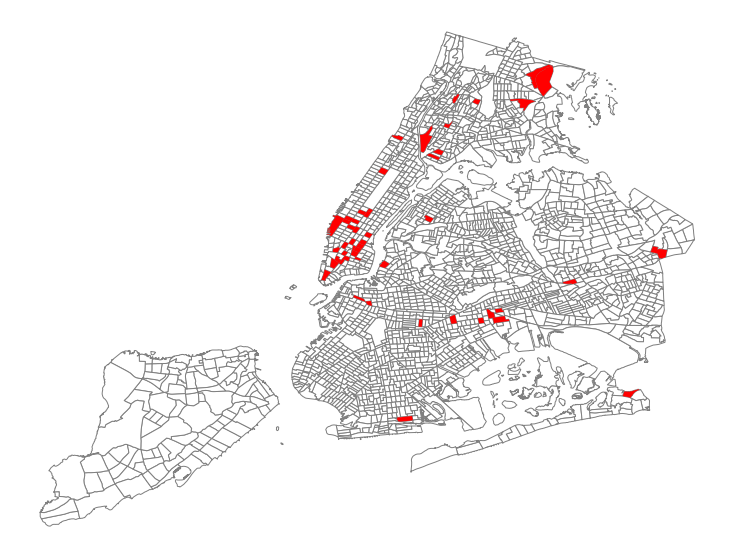

In [502]:
ax1 = ct.plot(color='white', edgecolor='grey', figsize=(15,10))
rfOP_sort.plot(color='red', ax=ax1)
plt.axis('off')

In [503]:
rfOP_sort.to_csv('rfOP_sort.csv')